# Boosting

- AdaBoost (AdaBoostClassifier / AdaBoostRegressor)
    - base_estimator: 子模型
    - n_estimators: 子模型數量
    - learning_rate: 子模型權重縮減係數
    - Boosting Tree

- Gradient Boost (GradientBoostingClassifier / GradientBoostingRegressor)
    - loss: 損失函數
    - n_estimators: 子模型數量
    - learning_rate: 子模型縮減係數

## 載入Iris資料集

In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os,sys
sys.path.append(os.path.abspath('./')) #for import common.utility
from utility import plot_confusion_matrix,plot_decision_regions,testcase_report

## AdaBoost (Adaptive Boosting) Algorithm

In [2]:
from sklearn.ensemble import AdaBoostClassifier

In [3]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
#iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
#只取 target 0,2
#iris_data = iris_data[iris_data['target'].isin([1,2])]
print(iris_data.shape)

target_names: ['setosa' 'versicolor' 'virginica']
(150, 5)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
     iris_data.drop(['target'],axis=1), iris_data['target'], test_size=0.3)#random_state=0

In [5]:
AdaBoost = AdaBoostClassifier(n_estimators=100, algorithm='SAMME')
AdaBoost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100)

In [6]:
print('training score:',AdaBoost.score(X_train,y_train))
print('test score:',AdaBoost.score(X_test,y_test))

training score: 1.0
test score: 0.9333333333333333


In [7]:
report=testcase_report(iris_data,AdaBoost,X_train,X_train,y_train)
report[0]

accuracy: 1.0
error_index : []
miss classification : []
number of errors :0/105
error data index: Index([], dtype='int64')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred


In [8]:
report=testcase_report(iris_data,AdaBoost,X_test,X_test,y_test)
report[0]

accuracy: 0.9333333333333333
error_index : [26 34 35]
miss classification : [1 1 2]
number of errors :3/45
error data index: Index([129, 106, 70], dtype='int64')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred
129,7.2,3.0,5.8,1.6,2,1
106,4.9,2.5,4.5,1.7,2,1
70,5.9,3.2,4.8,1.8,1,2


In [9]:
AdaBoost.predict(X_test)

array([0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1,
       2])

In [10]:
y_test.values

array([0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 0, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 1,
       2])

In [11]:
importances = AdaBoost.feature_importances_
print(importances)
indices = np.argsort(importances)  #np.argsort Returns the indices that would sort an array.
print(indices)

[0.03117359 0.06820555 0.41054056 0.49008029]
[0 1 2 3]


In [12]:
features =X_train.keys()
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


Text(0.5, 0, 'Relative Importance')

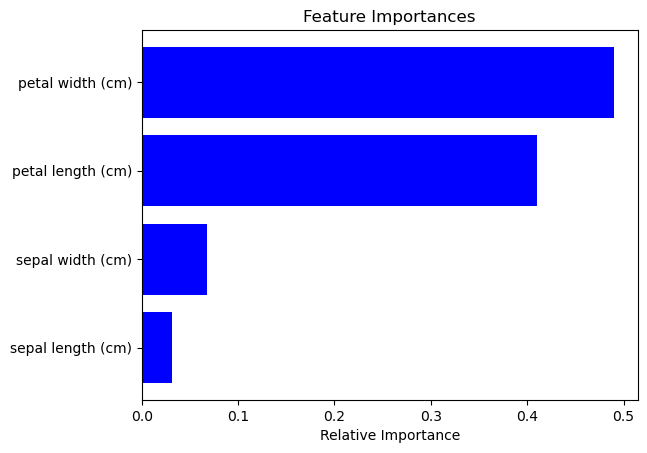

In [13]:
plt.figure(1)
print(features[indices])
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## Gradient Boost Algorithm

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
#iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
#只取 target 0,2
#iris_data = iris_data[iris_data['target'].isin([1,2])]
print(iris_data.shape)

target_names: ['setosa' 'versicolor' 'virginica']
(150, 5)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
     iris_data.drop(['target'],axis=1), iris_data['target'], test_size=0.3) #random_state=0

In [17]:
GradientBoost = GradientBoostingClassifier()
GradientBoost.fit(X_train, y_train)

GradientBoostingClassifier()

In [18]:
print('training score:',GradientBoost.score(X_train,y_train))
print('test score:',GradientBoost.score(X_test,y_test))

training score: 1.0
test score: 0.9555555555555556


# AdaBoostClassifier - Iris

target_names: ['setosa' 'versicolor' 'virginica']
iris_data.shape: (150, 5)
training score: 1.0
test score: 0.9333333333333333
accuracy: 1.0
error_index : []
miss classification : []
number of errors :0/105
error data index: Index([], dtype='int64')
report_train: Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), target, pred]
Index: []
accuracy: 0.9333333333333333
error_index : [23 35 42]
miss classification : [1 2 2]
number of errors :3/45
error data index: Index([133, 72, 68], dtype='int64')
report_test:      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
133                6.3               2.8                5.1               1.5   
72                 6.3               2.5                4.9               1.5   
68                 6.2               2.2                4.5               1.5   

     target  pred  
133       2     1  
72        1     2  
68        1     2  
importances: [0.02258334 0.139295

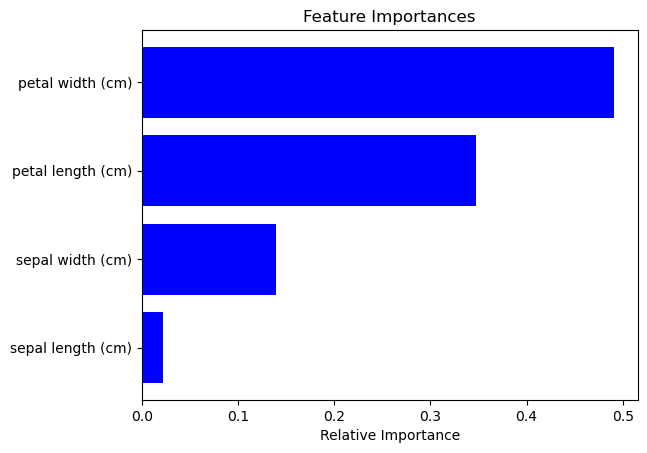

In [19]:
# 使用AdaBoostClassifier對Iris數據集進行分類
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, sys
sys.path.append(os.path.abspath('./'))  # 為了導入 common.utility
from utility import plot_confusion_matrix, plot_decision_regions, testcase_report

from sklearn.ensemble import AdaBoostClassifier

# 加載 Iris 數據集
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: " + str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x, y], axis=1)
print(f'iris_data.shape: {iris_data.shape}')

# 分割數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(
    iris_data.drop(['target'], axis=1), iris_data['target'], test_size=0.3)

# 初始化 AdaBoostClassifier 並訓練模型
# 設置基分類器的數量 n_estimators=100 並使用 SAMME 算法
AdaBoost = AdaBoostClassifier(n_estimators=100, algorithm='SAMME')
# 使用訓練集數據進行模型訓練
AdaBoost.fit(X_train, y_train)

# 打印訓練和測試分數
print('training score:', AdaBoost.score(X_train, y_train))
print('test score:', AdaBoost.score(X_test, y_test))
print('='*20)

# 使用 utility 模塊中的 testcase_report 函數來生成報告
report_train = testcase_report(iris_data, AdaBoost, X_train, X_train, y_train)
# 當訓練集準確率為1時，沒有錯誤分類的數據，報告顯示為空的是正常的
print(f'report_train: {report_train[0]}')
print('='*20)

report_test = testcase_report(iris_data, AdaBoost, X_test, X_test, y_test)
print(f'report_test: {report_test[0]}')
print('='*20)

# 進行預測
AdaBoost.predict(X_test)

# 獲取特徵重要性
importances = AdaBoost.feature_importances_
print(f'importances: {importances}')
indices = np.argsort(importances)  # np.argsort返回對數組進行排序後的索引
print(f'indices: {indices}')
print('='*20)

# 獲取特徵名稱
features = X_train.keys()
print(f'features: {features}')

# 繪製特徵重要性圖
plt.figure(1)
print(features[indices])
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

# GradientBoostingClassifier - Iris

target_names: ['setosa' 'versicolor' 'virginica']
iris_data.shape: (150, 5)
training score: 1.0
test score: 0.9333333333333333
accuracy: 1.0
error_index : []
miss classification : []
number of errors :0/105
error data index: Index([], dtype='int64')
report_train: Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), target, pred]
Index: []
accuracy: 0.9333333333333333
error_index : [ 2 22 23]
miss classification : [1 1 2]
number of errors :3/45
error data index: Index([119, 133, 70], dtype='int64')
report_test:      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
119                6.0               2.2                5.0               1.5   
133                6.3               2.8                5.1               1.5   
70                 5.9               3.2                4.8               1.8   

     target  pred  
119       2     1  
133       2     1  
70        1     2  
importances: [0.00552765 0.00351

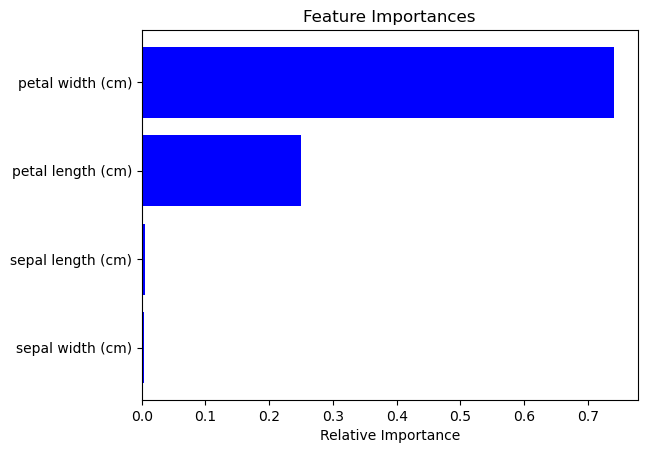

In [20]:
# 使用GradientBoostingClassifier對Iris數據集進行分類
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, sys
sys.path.append(os.path.abspath('./'))  # 為了導入 common.utility
from utility import plot_confusion_matrix, plot_decision_regions, testcase_report

from sklearn.ensemble import GradientBoostingClassifier

# 加載 Iris 數據集
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: " + str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x, y], axis=1)
print(f'iris_data.shape: {iris_data.shape}')

# 分割數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(
    iris_data.drop(['target'], axis=1), iris_data['target'], test_size=0.3)

# 初始化 GradientBoostingClassifier 並訓練模型
# 設置基分類器的數量 n_estimators=100
GradientBoost = GradientBoostingClassifier(n_estimators=100)
# 使用訓練集數據進行模型訓練
GradientBoost.fit(X_train, y_train)

# 打印訓練和測試分數
print('training score:', GradientBoost.score(X_train, y_train))
print('test score:', GradientBoost.score(X_test, y_test))
print('='*20)

# 使用 utility 模塊中的 testcase_report 函數來生成報告
report_train = testcase_report(iris_data, GradientBoost, X_train, X_train, y_train)
# 當訓練集準確率為1時，沒有錯誤分類的數據，報告顯示為空的是正常的
print(f'report_train: {report_train[0]}')
print('='*20)

report_test = testcase_report(iris_data, GradientBoost, X_test, X_test, y_test)
print(f'report_test: {report_test[0]}')
print('='*20)

# 進行預測
GradientBoost.predict(X_test)

# 獲取特徵重要性
importances = GradientBoost.feature_importances_
print(f'importances: {importances}')
indices = np.argsort(importances)  # np.argsort返回對數組進行排序後的索引
print(f'indices: {indices}')
print('='*20)

# 獲取特徵名稱
features = X_train.keys()
print(f'features: {features}')

# 繪製特徵重要性圖
plt.figure(1)
print(features[indices])
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

# AdaBoostClassifier - Iris (多次訓練)

In [21]:
# 使用AdaBoostClassifier對Iris數據集進行分類
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, sys
sys.path.append(os.path.abspath('./'))  # 為了導入 common.utility
from utility import plot_confusion_matrix, plot_decision_regions, testcase_report

from sklearn.ensemble import AdaBoostClassifier

# 加載 Iris 數據集
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x, y], axis=1)

# 分割數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(
    iris_data.drop(['target'], axis=1), iris_data['target'], test_size=0.3)

ada_train_scores = []
ada_test_scores = []

for i in range(10):
    # 初始化 AdaBoostClassifier 並訓練模型
    AdaBoost = AdaBoostClassifier(n_estimators=100, algorithm='SAMME')
    AdaBoost.fit(X_train, y_train)
    
    # 訓練和測試分數
    ada_train_score = AdaBoost.score(X_train, y_train)
    ada_test_score = AdaBoost.score(X_test, y_test)
    
    ada_train_scores.append(ada_train_score)
    ada_test_scores.append(ada_test_score)
    
    print(f'AdaBoost Run {i+1} - training score: {ada_train_score}, test score: {ada_test_score}')
    
# 輸出平均分數
print(f'AdaBoost - Average training score: {np.mean(ada_train_scores):.2f}, Average test score: {np.mean(ada_test_scores):.2f}')

AdaBoost Run 1 - training score: 1.0, test score: 0.9111111111111111
AdaBoost Run 2 - training score: 1.0, test score: 0.9111111111111111
AdaBoost Run 3 - training score: 1.0, test score: 0.9111111111111111
AdaBoost Run 4 - training score: 1.0, test score: 0.9111111111111111
AdaBoost Run 5 - training score: 1.0, test score: 0.9111111111111111
AdaBoost Run 6 - training score: 1.0, test score: 0.9111111111111111
AdaBoost Run 7 - training score: 1.0, test score: 0.9111111111111111
AdaBoost Run 8 - training score: 1.0, test score: 0.9111111111111111
AdaBoost Run 9 - training score: 1.0, test score: 0.9111111111111111
AdaBoost Run 10 - training score: 1.0, test score: 0.9111111111111111
AdaBoost - Average training score: 1.00, Average test score: 0.91


# GradientBoostingClassifier - Iris (多次訓練)

In [22]:
# 使用GradientBoostingClassifier對Iris數據集進行分類
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, sys
sys.path.append(os.path.abspath('./'))  # 為了導入 common.utility
from utility import plot_confusion_matrix, plot_decision_regions, testcase_report

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# 加載 Iris 數據集
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x, y], axis=1)

# 分割數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(
    iris_data.drop(['target'], axis=1), iris_data['target'], test_size=0.3)

grad_train_scores = []
grad_test_scores = []

for i in range(10):
    # 初始化 GradientBoostingClassifier 並訓練模型
    GradientBoost = GradientBoostingClassifier(n_estimators=100)
    GradientBoost.fit(X_train, y_train)
    
    # 訓練和測試分數
    grad_train_score = GradientBoost.score(X_train, y_train)
    grad_test_score = GradientBoost.score(X_test, y_test)
    
    grad_train_scores.append(grad_train_score)
    grad_test_scores.append(grad_test_score)
    
    print(f'GradientBoost Run {i+1} - training score: {grad_train_score}, test score: {grad_test_score}')

# 輸出平均分數
print(f'GradientBoost - Average training score: {np.mean(grad_train_scores):.2f}, Average test score: {np.mean(grad_test_scores):.2f}')

GradientBoost Run 1 - training score: 1.0, test score: 0.9555555555555556
GradientBoost Run 2 - training score: 1.0, test score: 0.9555555555555556
GradientBoost Run 3 - training score: 1.0, test score: 0.9555555555555556
GradientBoost Run 4 - training score: 1.0, test score: 0.9555555555555556
GradientBoost Run 5 - training score: 1.0, test score: 0.9555555555555556
GradientBoost Run 6 - training score: 1.0, test score: 0.9555555555555556
GradientBoost Run 7 - training score: 1.0, test score: 0.9555555555555556
GradientBoost Run 8 - training score: 1.0, test score: 0.9555555555555556
GradientBoost Run 9 - training score: 1.0, test score: 0.9555555555555556
GradientBoost Run 10 - training score: 1.0, test score: 0.9555555555555556
GradientBoost - Average training score: 1.00, Average test score: 0.96
